the data from 11/04/2024

c:\Users\s2342374\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 8771670.263783, 2426.329225 with index (248,): unable to solve 1phase PY flash with Tmin=169.849, Tmax=682.5 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [247.563 J/mol/K] is above the maximum value of 247.390746622 J/mol/K
  warnings.warn(
c:\Users\s2342374\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 9133000.049092, 2426.329225 with index (249,): unable to solve 1phase PY flash with Tmin=169.849, Tmax=682.5 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [247.563 J/mol/K] is above the maximum value of 246.954593629 J/mol/K
  warnings.warn(
c:\Users\s2342374\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 1426198.569157, 2593.934527 with index (203,): unable to solve 1phase PY flash with 

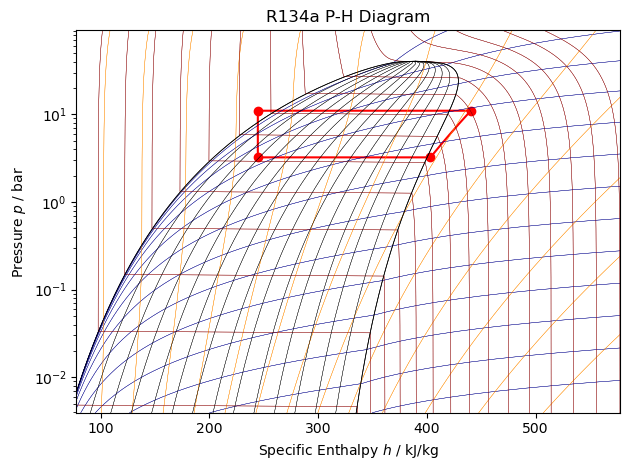

 h1 = 410334.7855535871  h2 = 447983.33720705006  h3 = 261059.84422014724  h4 = 204923.85215831746  h5 = 203803.37299725958  Q = 290.6850000506114  Qcomprcapa = 53.27792955515754  Qcondencapa =  264.52270417271563  COP =  5.456011569474959
 h1_ERR = 407682.92114182335  h2_ERR = 447312.87913129013  h3_ERR = 259530.6616265336  h4_ERR = 202416.41142470954  h5_ERR = 199358.22002612974  Q_ERR = 306.4570546139714  Qcomprcapa_ERR = 59.16639892530336  Qcondencapa_ERR =  280.3535041575753  COP_ERR =  5.179579291294516
 h1_ERR_P = 0.006504722847688802  h2_ERR_P = 0.0014988570797737912  h3_ERR_P = 0.0058921076378024816  h4_ERR_P = 0.01238753674150863  h5_ERR_P = 0.02229731470589581  Q_ERR_P = -0.051465790478301424  Qcomprcapa_ERR_P = -0.09952387634035188  Qcondencapa_ERR_P =  -0.056467280594295  COP_ERR_P =  0.05336963923789167
p_l =  1103783.9738442898 p_v =  323916.2538114387 T_v= 4.378040611083577 T_l= 43.627459100569354


In [2]:
import CoolProp
from CoolProp.Plots import PropertyPlot
from CoolProp.Plots import SimpleCompressionCycle
import matplotlib.pyplot as plt

# introduce CoolProp
CP = CoolProp.CoolProp

# introduce Propertyplot for plotting p-h diagram and cycle
pp = PropertyPlot('HEOS::R134a', 'PH', unit_system='EUR')
cycle = SimpleCompressionCycle('HEOS::R134a', 'PH', unit_system='EUR')

# T and P values. e- evaporator , c- condenser
T1 = 14.49+273.15   # compressor inlet
T2 = 68.02+273.15   # compressor outlet
T3 = 43.1+273.15   # condenser inlet
T4 = 3.65+273.15    # evaporator inlet
T5 = 2.82+273.15   # evaporator outlet

P1_bar = 2.41
P2_bar = 10.18

PSA = 1011.6

# error calculation
# T and P values. e- evaporator , c- condenser
T1_ERR = 14.49+273.15*(1-0.012)   # compressor inlet
T2_ERR = 68.02+273.15*(1-0.0024)  # compressor outlet
T3_ERR = 43.1+273.15*(1-0.0037)  # condenser inlet
T4_ERR = 3.65+273.15*(1-0.0068)    # evaporator inlet
T5_ERR = 2.82+273.15*(1-0.0121)   # evaporator outlet

P1_bar_ERR = 2.41*(1-0.0522)
P2_bar_ERR = 10.18*(1-0.0018)

PSA = 1011.6

F = 4.43
F_ERR =4.43*(1+0.055)
# plot the p-h diagram
pp.calc_isolines()

# plot the cycle, 0.7 is the Isentropic compressor efficiency, need calculate in our experiment 
cycle.simple_solve_dt(T5, T3, P1_bar+1, P2_bar+1, 0.7, SI=True) #http://www.coolprop.org/apidoc/CoolProp.Plots.SimpleCyclesCompression.html
cycle.steps = 50
sc = cycle.get_state_changes()
plt.close(cycle.figure)
pp.draw_process(sc)
# plt.close(cycle.figure)

# plot the p-h diagram

pp.title("R134a P-H Diagram")
pp.savefig('./plotDiagram/R134_p_h_diagram_with_cycle.svg',dpi=300, bbox_inches='tight')
pp.show()

# show the diagram by plt while it's doesn't work, need to use api from propertyPlot
# plt.title("p-h diagram")
# plt.show()
# plt.savefig('p_h_diagram2.png')

# calculation for h and Q and COP
P1_pa = P1_bar*100000 + PSA *100
P2_pa = P2_bar*100000 + PSA *100

m = F*1.15/3600

working_fluid='R134a'

h1 = CP.PropsSI('H', 'T', T1, 'P', P1_pa, working_fluid) 
h2 = CP.PropsSI('H', 'T', T2, 'P', P2_pa, working_fluid)
h3 = CP.PropsSI('H', 'T', T3, 'P', P2_pa, working_fluid) 
h4 = CP.PropsSI('H', 'T', T4, 'P', P1_pa, working_fluid)
h5 = CP.PropsSI('H', 'T', T5, 'P', P1_pa, working_fluid) 

P1_pa_ERR = P1_bar_ERR*100000 + PSA *100
P2_pa_ERR = P2_bar_ERR*100000 + PSA *100

m_ERR = F_ERR*1.15/3600

working_fluid='R134a'

h1_ERR = CP.PropsSI('H', 'T', T1_ERR, 'P', P1_pa_ERR, working_fluid) 
h2_ERR = CP.PropsSI('H', 'T', T2_ERR, 'P', P2_pa_ERR, working_fluid)
h3_ERR = CP.PropsSI('H', 'T', T3_ERR, 'P', P2_pa_ERR, working_fluid) 
h4_ERR = CP.PropsSI('H', 'T', T4_ERR, 'P', P1_pa_ERR, working_fluid)
h5_ERR = CP.PropsSI('H', 'T', T5_ERR, 'P', P1_pa_ERR, working_fluid) 

# pp.state.update(CoolProp.PT_INPUTS,P1_pa,T1)
# h11 = pp.state.keyed_output(CoolProp.iHmass) 

# pp.state.update(CoolProp.PT_INPUTS,P2_pa,T2)
# h21 = pp.state.keyed_output(CoolProp.iHmass) 

# pp.state.update(CoolProp.PT_INPUTS,P2_pa,T3)
# h31 = pp.state.keyed_output(CoolProp.iHmass) 

# pp.state.update(CoolProp.PT_INPUTS,P1_pa,T4)
# h41 = pp.state.keyed_output(CoolProp.iHmass) 

# pp.state.update(CoolProp.PT_INPUTS,P1_pa,T5)
# h51 = pp.state.keyed_output(CoolProp.iHmass) 

Q = m*(h1-h4)
Qcomprcapa = m*(h2-h1)
Qcondencapa = m*(h2-h3)

COP = Q/Qcomprcapa

# print the value of calculation 
print(" h1 =", h1, " h2 =",h2," h3 =", h3, " h4 =",h4," h5 =", h5, " Q =",Q, " Qcomprcapa =",Qcomprcapa, " Qcondencapa = ", Qcondencapa," COP = ", COP)
# print(" h11 =", h11, " h21 =",h21," h31 =", h31, " h41 =",h41," h51 =", h51, " Q =",Q)

# error
Q_ERR = m_ERR*(h1_ERR-h4_ERR)
Qcomprcapa_ERR = m_ERR*(h2_ERR-h1_ERR)
Qcondencapa_ERR = m_ERR*(h2_ERR-h3_ERR)

COP_ERR = Q_ERR/Qcomprcapa_ERR

# print the value of calculation 
print(" h1_ERR =", h1_ERR, " h2_ERR =",h2_ERR," h3_ERR =", h3_ERR, " h4_ERR =",h4_ERR," h5_ERR =", h5_ERR, " Q_ERR =",Q_ERR, " Qcomprcapa_ERR =",Qcomprcapa_ERR, " Qcondencapa_ERR = ", Qcondencapa_ERR," COP_ERR = ", COP_ERR)

# relative error of enthapy, Q and COP calculation
h1_ERR_P = (h1-h1_ERR)/h1_ERR
h2_ERR_P = (h2-h2_ERR)/h2_ERR
h3_ERR_P = (h3-h3_ERR)/h3_ERR
h4_ERR_P = (h4-h4_ERR)/h4_ERR
h5_ERR_P = (h5-h5_ERR)/h5_ERR

Q_ERR_P = (Q-Q_ERR)/Q_ERR

Qcomprcapa_ERR_P = (Qcomprcapa-Qcomprcapa_ERR)/Qcomprcapa_ERR
Qcondencapa_ERR_P = (Qcondencapa-Qcondencapa_ERR)/Qcondencapa_ERR
COP_ERR_P = (COP-COP_ERR)/COP_ERR

print(" h1_ERR_P =", h1_ERR_P, " h2_ERR_P =",h2_ERR_P," h3_ERR_P =", h3_ERR_P, " h4_ERR_P =",h4_ERR_P," h5_ERR_P =", h5_ERR_P, " Q_ERR_P =",Q_ERR_P, " Qcomprcapa_ERR_P =",Qcomprcapa_ERR_P, " Qcondencapa_ERR_P = ", Qcondencapa_ERR_P," COP_ERR_P = ", COP_ERR_P)

# This part Quality(0(liquid)-1(vapor)) and temperature are need for calculation.
# Calculate saturation liquid pressure based on the temperature and quality
T_l_input = T3
pp.state.update(CoolProp.QT_INPUTS,0.0,T_l_input) # Q means quality Quality (Q) is a dimensionless quantity that represents the ratio of the mass of vapor to the total mass (vapor + liquid) in a two-phase mixture. Its value ranges from 0 (saturated liquid) to 1 (saturated vapor).Temperature (T) is the thermodynamic temperature of the fluid. 
p_l = pp.state.keyed_output(CoolProp.iP)
# Calculate saturation vapor pressure based on the temperature and quality
T_v_input = T5
pp.state.update(CoolProp.QT_INPUTS,1.0,T_v_input)
p_v = pp.state.keyed_output(CoolProp.iP)
# Calculate saturation vapor tempreature based on the pressure and quality
p_v_input = P1_pa
pp.state.update(CoolProp.PQ_INPUTS,p_v_input,1)
T_v = pp.state.keyed_output(CoolProp.iT) -273.15
# Calculate saturation liquid tempreature based on the pressure and quality
p_l_input = P2_pa
pp.state.update(CoolProp.PQ_INPUTS,p_l_input,0)
T_l = pp.state.keyed_output(CoolProp.iT) -273.15

# print the pressure and temperature under staturation phase
print ("p_l = ",p_l, "p_v = ", p_v, "T_v=", T_v, "T_l=", T_l)

# plot the saturation cycle
# pp.calc_isolines(CoolProp.iT, [T0-273.15,T2-273.15], num=2)
# cycle.simple_solve(T2, p0, T0, p2, 0.7, SI=True)
# cycle.steps = 50
# sc = cycle.get_state_changes()
# # sc.set_color('blue')
# pp.draw_process(sc,line_opts={'color':'blue', 'lw':1.5})
# plt.close(cycle.figure)
# pp.show()
# print ("P0 = ",p0, "P2 = ", p2)


the data from 01/01/2024

c:\Users\s2342374\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 8771670.263783, 2426.329225 with index (248,): unable to solve 1phase PY flash with Tmin=169.849, Tmax=682.5 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [247.563 J/mol/K] is above the maximum value of 247.390746622 J/mol/K
  warnings.warn(
c:\Users\s2342374\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 9133000.049092, 2426.329225 with index (249,): unable to solve 1phase PY flash with Tmin=169.849, Tmax=682.5 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [247.563 J/mol/K] is above the maximum value of 246.954593629 J/mol/K
  warnings.warn(
c:\Users\s2342374\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 1426198.569157, 2593.934527 with index (203,): unable to solve 1phase PY flash with 

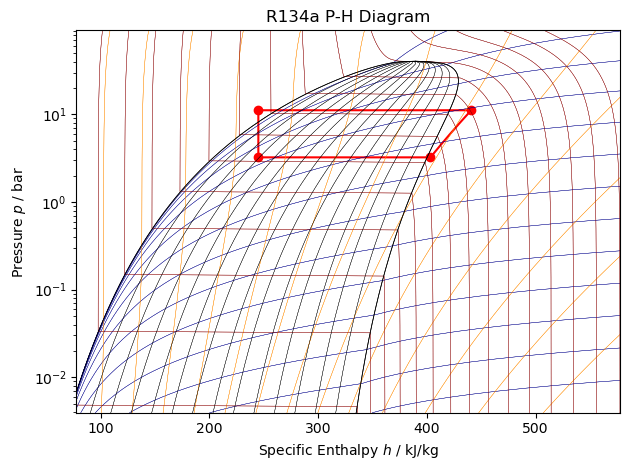

 h1 = 401582.770512882  h2 = 449245.15210972703  h3 = 261784.87805468508  h4 = 205031.92381441974  h5 = 203816.82698025455  Q = 265.58933160129715  Qcomprcapa = 64.40379313273688  Qcondencapa =  253.3056953168755  COP =  4.123815053158667
p_l =  1117769.9755791083 p_v =  324030.91540769464 T_v= 4.364656381929308 T_l= 44.13140060631298


In [1]:
import CoolProp
from CoolProp.Plots import PropertyPlot
from CoolProp.Plots import SimpleCompressionCycle
import matplotlib.pyplot as plt

# introduce CoolProp
CP = CoolProp.CoolProp

# introduce Propertyplot for plotting p-h diagram and cycle
pp = PropertyPlot('HEOS::R134a', 'PH', unit_system='EUR')
cycle = SimpleCompressionCycle('HEOS::R134a', 'PH', unit_system='EUR')

# T and P values. e- evaporator , c- condenser
T1 = 4.86+273.15   # compressor inlet
T2 = 69.43+273.15   # compressor outlet
T3 = 43.58+273.15   # condenser inlet
T4 = 3.73+273.15    # evaporator inlet
T5 = 2.83+273.15   # evaporator outlet

P1_bar = 2.42
P2_bar = 10.34

PSA = 1000

# plot the p-h diagram
pp.calc_isolines()

# plot the cycle, 0.7 is the Isentropic compressor efficiency, need calculate in our experiment 
cycle.simple_solve_dt(T5, T3, P1_bar+1, P2_bar+1, 0.7, SI=True) #http://www.coolprop.org/apidoc/CoolProp.Plots.SimpleCyclesCompression.html
cycle.steps = 50
sc = cycle.get_state_changes()
plt.close(cycle.figure)
pp.draw_process(sc)
# plt.close(cycle.figure)

# plot the p-h diagram

pp.title("R134a P-H Diagram")
pp.savefig('./plotDiagram/R134_p_h_diagram_with_cycle.svg',dpi=300, bbox_inches='tight')
pp.show()

# show the diagram by plt while it's doesn't work, need to use api from propertyPlot
# plt.title("p-h diagram")
# plt.show()
# plt.savefig('p_h_diagram2.png')

# calculation for h and Q and COP
P1_pa = P1_bar*100000 + PSA *100
P2_pa = P2_bar*100000 + PSA *100

m = 4.23*1.15/3600

working_fluid='R134a'

h1 = CP.PropsSI('H', 'T', T1, 'P', P1_pa, working_fluid) 
h2 = CP.PropsSI('H', 'T', T2, 'P', P2_pa, working_fluid)
h3 = CP.PropsSI('H', 'T', T3, 'P', P2_pa, working_fluid) 
h4 = CP.PropsSI('H', 'T', T4, 'P', P1_pa, working_fluid)
h5 = CP.PropsSI('H', 'T', T5, 'P', P1_pa, working_fluid) 

# pp.state.update(CoolProp.PT_INPUTS,P1_pa,T1)
# h11 = pp.state.keyed_output(CoolProp.iHmass) 

# pp.state.update(CoolProp.PT_INPUTS,P2_pa,T2)
# h21 = pp.state.keyed_output(CoolProp.iHmass) 

# pp.state.update(CoolProp.PT_INPUTS,P2_pa,T3)
# h31 = pp.state.keyed_output(CoolProp.iHmass) 

# pp.state.update(CoolProp.PT_INPUTS,P1_pa,T4)
# h41 = pp.state.keyed_output(CoolProp.iHmass) 

# pp.state.update(CoolProp.PT_INPUTS,P1_pa,T5)
# h51 = pp.state.keyed_output(CoolProp.iHmass) 


Q = m*(h1-h4)
Qcomprcapa = m*(h2-h1)
Qcondencapa = m*(h2-h3)

COP = Q/Qcomprcapa

# print the value of calculation 
print(" h1 =", h1, " h2 =",h2," h3 =", h3, " h4 =",h4," h5 =", h5, " Q =",Q, " Qcomprcapa =",Qcomprcapa, " Qcondencapa = ", Qcondencapa," COP = ", COP)
# print(" h11 =", h11, " h21 =",h21," h31 =", h31, " h41 =",h41," h51 =", h51, " Q =",Q)


# This part Quality(0(liquid)-1(vapor)) and temperature are need for calculation.
# Calculate saturation liquid pressure based on the temperature and quality
T_l_input = T3
pp.state.update(CoolProp.QT_INPUTS,0.0,T_l_input) # Q means quality Quality (Q) is a dimensionless quantity that represents the ratio of the mass of vapor to the total mass (vapor + liquid) in a two-phase mixture. Its value ranges from 0 (saturated liquid) to 1 (saturated vapor).Temperature (T) is the thermodynamic temperature of the fluid. 
p_l = pp.state.keyed_output(CoolProp.iP)
# Calculate saturation vapor pressure based on the temperature and quality
T_v_input = T5
pp.state.update(CoolProp.QT_INPUTS,1.0,T_v_input)
p_v = pp.state.keyed_output(CoolProp.iP)
# Calculate saturation vapor tempreature based on the pressure and quality
p_v_input = P1_pa
pp.state.update(CoolProp.PQ_INPUTS,p_v_input,1)
T_v = pp.state.keyed_output(CoolProp.iT) -273.15
# Calculate saturation liquid tempreature based on the pressure and quality
p_l_input = P2_pa
pp.state.update(CoolProp.PQ_INPUTS,p_l_input,0)
T_l = pp.state.keyed_output(CoolProp.iT) -273.15

# print the pressure and temperature under staturation phase
print ("p_l = ",p_l, "p_v = ", p_v, "T_v=", T_v, "T_l=", T_l)

# plot the saturation cycle
# pp.calc_isolines(CoolProp.iT, [T0-273.15,T2-273.15], num=2)
# cycle.simple_solve(T2, p0, T0, p2, 0.7, SI=True)
# cycle.steps = 50
# sc = cycle.get_state_changes()
# # sc.set_color('blue')
# pp.draw_process(sc,line_opts={'color':'blue', 'lw':1.5})
# plt.close(cycle.figure)
# pp.show()
# print ("P0 = ",p0, "P2 = ", p2)


the data from 15/04/2024

c:\Users\s2342374\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 8771670.263783, 2426.329225 with index (248,): unable to solve 1phase PY flash with Tmin=169.849, Tmax=682.5 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [247.563 J/mol/K] is above the maximum value of 247.390746622 J/mol/K
  warnings.warn(
c:\Users\s2342374\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 9133000.049092, 2426.329225 with index (249,): unable to solve 1phase PY flash with Tmin=169.849, Tmax=682.5 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [247.563 J/mol/K] is above the maximum value of 246.954593629 J/mol/K
  warnings.warn(
c:\Users\s2342374\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 1426198.569157, 2593.934527 with index (203,): unable to solve 1phase PY flash with 

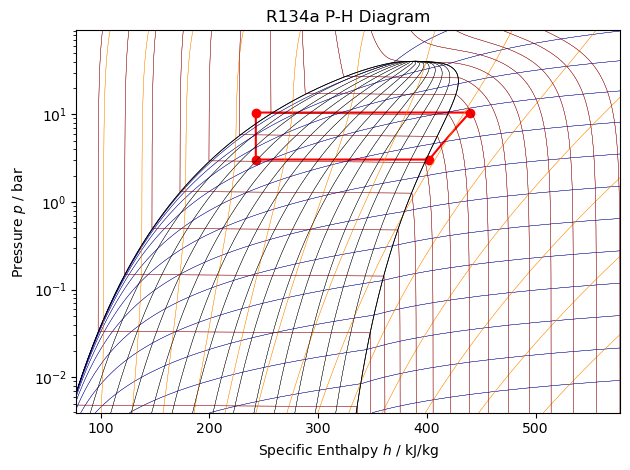

 h1 = 410388.2114193483  h2 = 450695.6473244296  h3 = 258337.2897081557  h4 = 202855.56920764587  h5 = 201631.10413891048  Q = 254.57337444635496  Qcomprcapa = 49.44378804356636  Qcondencapa =  235.95958534262928  COP =  5.148743341065272
p_l =  1052222.6731142784 p_v =  305857.8680132659 T_v= 2.639503570480315 T_l= 41.70395037614236


In [1]:
import CoolProp
from CoolProp.Plots import PropertyPlot
from CoolProp.Plots import SimpleCompressionCycle
import matplotlib.pyplot as plt

# introduce CoolProp
CP = CoolProp.CoolProp

# introduce Propertyplot for plotting p-h diagram and cycle
pp = PropertyPlot('HEOS::R134a', 'PH', unit_system='EUR')
cycle = SimpleCompressionCycle('HEOS::R134a', 'PH', unit_system='EUR')

# T and P values. e- evaporator , c- condenser
T1 = 14.01+273.15   # compressor inlet
T2 = 69.72+273.15   # compressor outlet
T3 = 41.29+273.15   # condenser inlet
T4 = 2.12+273.15    # evaporator inlet
T5 = 1.21+273.15   # evaporator outlet

P1_bar = 2.23
P2_bar = 9.65

PSA = 988.52

# plot the p-h diagram
pp.calc_isolines()

# plot the cycle, 0.7 is the Isentropic compressor efficiency, need calculate in our experiment 
cycle.simple_solve_dt(T5, T3, P1_bar+1, P2_bar+1, 0.7, SI=True) #http://www.coolprop.org/apidoc/CoolProp.Plots.SimpleCyclesCompression.html
cycle.steps = 50
sc = cycle.get_state_changes()
plt.close(cycle.figure)
pp.draw_process(sc)
# plt.close(cycle.figure)

# plot the p-h diagram

pp.title("R134a P-H Diagram")
pp.savefig('./plotDiagram/R134_p_h_diagram_with_cycle.svg',dpi=300, bbox_inches='tight')
pp.show()

# show the diagram by plt while it's doesn't work, need to use api from propertyPlot
# plt.title("p-h diagram")
# plt.show()
# plt.savefig('p_h_diagram2.png')

# calculation for h and Q and COP
P1_pa = P1_bar*100000 + PSA *100
P2_pa = P2_bar*100000 + PSA *100

m = 3.84*1.15/3600

working_fluid='R134a'

h1 = CP.PropsSI('H', 'T', T1, 'P', P1_pa, working_fluid) 
h2 = CP.PropsSI('H', 'T', T2, 'P', P2_pa, working_fluid)
h3 = CP.PropsSI('H', 'T', T3, 'P', P2_pa, working_fluid) 
h4 = CP.PropsSI('H', 'T', T4, 'P', P1_pa, working_fluid)
h5 = CP.PropsSI('H', 'T', T5, 'P', P1_pa, working_fluid) 

# pp.state.update(CoolProp.PT_INPUTS,P1_pa,T1)
# h11 = pp.state.keyed_output(CoolProp.iHmass) 

# pp.state.update(CoolProp.PT_INPUTS,P2_pa,T2)
# h21 = pp.state.keyed_output(CoolProp.iHmass) 

# pp.state.update(CoolProp.PT_INPUTS,P2_pa,T3)
# h31 = pp.state.keyed_output(CoolProp.iHmass) 

# pp.state.update(CoolProp.PT_INPUTS,P1_pa,T4)
# h41 = pp.state.keyed_output(CoolProp.iHmass) 

# pp.state.update(CoolProp.PT_INPUTS,P1_pa,T5)
# h51 = pp.state.keyed_output(CoolProp.iHmass) 


Q = m*(h1-h4)
Qcomprcapa = m*(h2-h1)
Qcondencapa = m*(h2-h3)

COP = Q/Qcomprcapa

# print the value of calculation 
print(" h1 =", h1, " h2 =",h2," h3 =", h3, " h4 =",h4," h5 =", h5, " Q =",Q, " Qcomprcapa =",Qcomprcapa, " Qcondencapa = ", Qcondencapa," COP = ", COP)
# print(" h11 =", h11, " h21 =",h21," h31 =", h31, " h41 =",h41," h51 =", h51, " Q =",Q)


# This part Quality(0(liquid)-1(vapor)) and temperature are need for calculation.
# Calculate saturation liquid pressure based on the temperature and quality
T_l_input = T3
pp.state.update(CoolProp.QT_INPUTS,0.0,T_l_input) # Q means quality Quality (Q) is a dimensionless quantity that represents the ratio of the mass of vapor to the total mass (vapor + liquid) in a two-phase mixture. Its value ranges from 0 (saturated liquid) to 1 (saturated vapor).Temperature (T) is the thermodynamic temperature of the fluid. 
p_l = pp.state.keyed_output(CoolProp.iP)
# Calculate saturation vapor pressure based on the temperature and quality
T_v_input = T5
pp.state.update(CoolProp.QT_INPUTS,1.0,T_v_input)
p_v = pp.state.keyed_output(CoolProp.iP)
# Calculate saturation vapor tempreature based on the pressure and quality
p_v_input = P1_pa
pp.state.update(CoolProp.PQ_INPUTS,p_v_input,1)
T_v = pp.state.keyed_output(CoolProp.iT) -273.15
# Calculate saturation liquid tempreature based on the pressure and quality
p_l_input = P2_pa
pp.state.update(CoolProp.PQ_INPUTS,p_l_input,0)
T_l = pp.state.keyed_output(CoolProp.iT) -273.15

# print the pressure and temperature under staturation phase
print ("p_l = ",p_l, "p_v = ", p_v, "T_v=", T_v, "T_l=", T_l)

# plot the saturation cycle
# pp.calc_isolines(CoolProp.iT, [T0-273.15,T2-273.15], num=2)
# cycle.simple_solve(T2, p0, T0, p2, 0.7, SI=True)
# cycle.steps = 50
# sc = cycle.get_state_changes()
# # sc.set_color('blue')
# pp.draw_process(sc,line_opts={'color':'blue', 'lw':1.5})
# plt.close(cycle.figure)
# pp.show()
# print ("P0 = ",p0, "P2 = ", p2)